In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


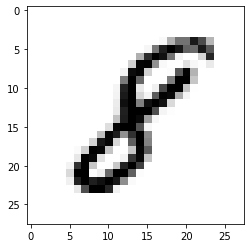

In [3]:
import matplotlib .pyplot as plt

image_index = 7777 # anything upto 60000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap = 'Greys')


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])
model.fit(x = x_train, y= y_train, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2162 - accuracy: 0.9357
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0893 - accuracy: 0.9731
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0628 - accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0477 - accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0379 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0255 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0217 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0617 - accuracy: 0.9850


[0.06174600124359131, 0.9850000143051147]

5


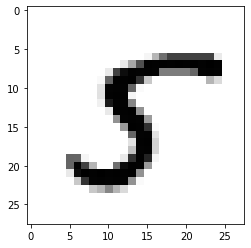

In [12]:
image_index = 4233
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())